<a href="https://colab.research.google.com/github/Orixtosius/RNN_Exercises/blob/main/SensitivityAnalysisForNewHeadlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! kaggle datasets download ankurzing/sentiment-analysis-for-financial-news

  0% 0.00/903k [00:00<?, ?B/s]
100% 903k/903k [00:00<00:00, 122MB/s]


In [7]:
! unzip sentiment-analysis-for-financial-news.zip

Archive:  sentiment-analysis-for-financial-news.zip
  inflating: FinancialPhraseBank/License.txt  
  inflating: FinancialPhraseBank/README.txt  
  inflating: FinancialPhraseBank/Sentences_50Agree.txt  
  inflating: FinancialPhraseBank/Sentences_66Agree.txt  
  inflating: FinancialPhraseBank/Sentences_75Agree.txt  
  inflating: FinancialPhraseBank/Sentences_AllAgree.txt  
  inflating: all-data.csv            


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Dense, LSTM,  Input, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model

In [109]:
df = pd.read_csv('/content/FinancialPhraseBank/Sentences_50Agree.txt',sep='.@', encoding='latin-1', header = None)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
df

In [ ]:
df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df

In [ ]:
df.rename(columns = {0:'Sentence', 1:'Sentiment'}, inplace = True)
df

In [ ]:
df['Sentiment_Numerical'] = df['Sentiment'].map({'neutral':0, 'positive':1,'negative':2})
Y = df['Sentiment_Numerical'].values
print(Y)
df

In [ ]:
plt.hist(df['Sentiment_Numerical'])

In [114]:
df_train, df_test, Y_train, Y_test = train_test_split(df['Sentence'], Y, test_size = 0.3)
# Split given X into train and test. The same for Y too.

In [115]:
tok = Tokenizer(num_words = 10000)
tok.fit_on_texts(df_train)
seq_train = tok.texts_to_sequences(df_train)
seq_test = tok.texts_to_sequences(df_test)

In [116]:
print(f'Lenght of different sentences as sequence list: \n{len(seq_train[0])}\n{len(seq_train[1])}\n{len(seq_train[2])}')

Lenght of different sentences as sequence list: 
19
14
20


In [117]:
word2idx = tok.word_index
V = len(word2idx)
V

8380

In [118]:
data_train = pad_sequences(seq_train, padding = 'post')
data_test = pad_sequences(seq_test, padding = 'post')

In [119]:
print(f'Compare shapes {data_train.shape} - {data_test.shape} ')
# THE purpose is matching lenght of T
# In this example, the data wanted to be formed in format of N x T
N, T = data_train.shape

Compare shapes (3392, 71) - (1454, 50) 


In [120]:
data_test = pad_sequences(seq_test, padding = 'post', maxlen = T)

In [121]:
print(f'New Comparaison shapes {data_train.shape} - {data_test.shape} ')

New Comparaison shapes (3392, 71) - (1454, 71) 


In [122]:
# Embedding dimensionality 
D = 10

#T is given above

# hidden unit
M = 5

#output unit cuz values are {-1, 0, 1}
K = 3

In [123]:
print(f'Shape of datas {data_train.shape} - {Y_train.shape} - {data_test.shape} - {Y_test.shape}')

Shape of datas (3392, 71) - (3392,) - (1454, 71) - (1454,)


In [125]:
i = Input(shape = (T,))
e = Embedding(V+1, D)(i)
l = LSTM(M, return_sequences = True)(e)
gm = GlobalAveragePooling1D()(l)
d = Dense(K, activation = 'softmax' )(gm)

In [126]:
model = Model(i, d)
model.compile( loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [127]:
r = model.fit(data_train, Y_train, epochs = 50,validation_data = (data_test, Y_test))

Epoch 1/50
106/106 [==============================] - 5s 27ms/step - loss: 1.0187 - accuracy: 0.5737 - val_loss: 0.9263 - val_accuracy: 0.5894
Epoch 2/50
106/106 [==============================] - 2s 22ms/step - loss: 0.8868 - accuracy: 0.5964 - val_loss: 0.8660 - val_accuracy: 0.5990
Epoch 3/50
106/106 [==============================] - 2s 22ms/step - loss: 0.7314 - accuracy: 0.7070 - val_loss: 0.8195 - val_accuracy: 0.6706
Epoch 4/50
106/106 [==============================] - 2s 22ms/step - loss: 0.6496 - accuracy: 0.7653 - val_loss: 0.8101 - val_accuracy: 0.6630
Epoch 5/50
106/106 [==============================] - 2s 22ms/step - loss: 0.5681 - accuracy: 0.7957 - val_loss: 0.8387 - val_accuracy: 0.6451
Epoch 6/50
106/106 [==============================] - 2s 22ms/step - loss: 0.4993 - accuracy: 0.8264 - val_loss: 0.8581 - val_accuracy: 0.6671
Epoch 7/50
106/106 [==============================] - 2s 22ms/step - loss: 0.4506 - accuracy: 0.8390 - val_loss: 0.8895 - val_accuracy: 0.6678

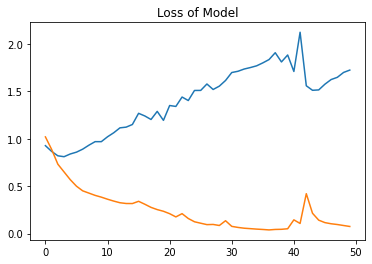

In [129]:
plt.title('Loss of Model')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.plot(r.history['loss'], label='Training Loss')

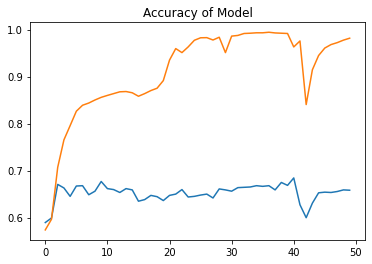

In [130]:
plt.title('Accuracy of Model')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.plot(r.history['accuracy'], label='Training Accuracy')

MODEL IS OVERFITTED

In [132]:
model.predict()

array([[3.8171031e-02, 1.7045335e-01, 7.9137558e-01],
       [9.9582690e-01, 1.0341898e-03, 3.1388351e-03],
       [9.1387867e-04, 9.9389279e-01, 5.1934063e-03],
       ...,
       [9.9700564e-01, 4.6792728e-04, 2.5264507e-03],
       [1.3424583e-03, 9.9240947e-01, 6.2481100e-03],
       [9.9552095e-01, 8.2215032e-04, 3.6568476e-03]], dtype=float32)

In [154]:
ex = data_test[3:4,]
ex_in_sent = Y_test[3]
print(f'Sequence : {ex} vs Sentiment : {ex_in_sent}')

Sequence : [[  88  274   11 1064 3755   13 2644   64  622    5   64  622    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]] vs Sentiment : 1


In [158]:
p = model.predict(ex)
print(f'Result is {np.argmax(p)}')

Result is 1
